In [1]:
import matplotlib.pyplot as plt
import healpy as hp
from echolens import simulation

In [2]:
folder = '/pscratch/sd/l/lonappan/ECHOLENS'
nside = 1024

In [3]:
cmbmap = simulation.CMBlensed(libdir=folder,nside=nside)
noisemap = simulation.GaussianNoiseMap()

In [4]:
alms_signal = cmbmap.get_lensed_alms(1)


In [5]:
alms_noise = noisemap.noise_alm_idx(0)

In [6]:
cmbspectra = simulation.CMBspectra()
noisespec = simulation.NoiseSpectra()

In [7]:
cl_len = cmbspectra.get_lensed_spectra(dl=False)
cl_nt = noisespec.noise_T()
cl_np = noisespec.noise_P()

In [8]:
tlm,elm,blm = alms_signal

In [9]:
which = 0
tlm_n,elm_n,blm_n = alms_noise

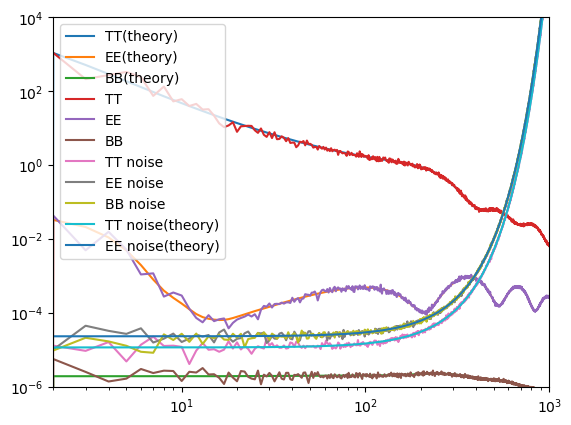

In [10]:
plt.loglog(cl_len['tt'], label='TT(theory)')
plt.loglog(cl_len['ee'], label='EE(theory)')
plt.loglog(cl_len['bb'], label='BB(theory)')
plt.loglog(hp.alm2cl(tlm), label='TT')
plt.loglog(hp.alm2cl(elm), label='EE')
plt.loglog(hp.alm2cl(blm), label='BB')
plt.loglog(hp.alm2cl(tlm_n), label='TT noise')
plt.loglog(hp.alm2cl(elm_n), label='EE noise')
plt.loglog(hp.alm2cl(blm_n), label='BB noise')
plt.loglog(cl_nt[which], label='TT noise(theory)')
plt.loglog(cl_np[which], label='EE noise(theory)')
plt.xlim(2, 1000)
plt.ylim(1e-6, 1e4)
plt.legend()